## Construimos nuestra matriz con base a la información del cliente:

In [1]:
import numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import NearestNeighbors
from numpy import random

#Cargamos la base de datos:
data = pd.read_csv('german_credit_data_2.csv')

data
#Notemos que existen varios campos vacíos que debemos llenar

,Customer,Age,Credit amount,Duration,Key,Tarjeta de Credito Oro,Tarjeta de Credito Plata,Tarjeta de Credito Bronce,Cuenta corriente,Cuenta de ahorro,Tarjeta de Debito,Prestamo hipotecario,Prestamo automotriz,Prestamo personal,Transferencias,Cambio de moneda,Cheques
0,0,67,1169,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,22,5951,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,49,2096,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,45,7882,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,53,4870,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1736,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,996,40,3857,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,997,38,804,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,998,23,1845,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Asignamos las llaves correspondientes de acuerdo a su edad y monto de crédito:

In [2]:
# Asignamos etiquetas para la columna llave:

data['Key'] = np.where((data['Credit amount']>= 5000) & (data['Age']>20)  & (data['Age']<50), 'Key_A', data['Key'])
data['Key'] = np.where((data['Credit amount']>= 5000) & (data['Age']<20), 'Key_B', data['Key'])
data['Key'] = np.where((data['Credit amount']>= 5000) & (data['Age']>50), 'Key_B', data['Key'])
data['Key'] = np.where((data['Credit amount']< 5000) & (data['Credit amount']>= 1000) & (data['Age']>20)  & (data['Age']<50), 'Key_B', data['Key'])
data['Key'] = np.where((data['Credit amount']< 5000) & (data['Credit amount']>= 1000) & ((data['Age']<20)), 'Key_C', data['Key'])
data['Key'] = np.where((data['Credit amount']< 5000) & (data['Credit amount']>= 1000) & ((data['Age']>50)), 'Key_C', data['Key'])
data['Key'] = np.where((data['Credit amount']< 1000), 'Key_C', data['Key'])

data

,Customer,Age,Credit amount,Duration,Key,Tarjeta de Credito Oro,Tarjeta de Credito Plata,Tarjeta de Credito Bronce,Cuenta corriente,Cuenta de ahorro,Tarjeta de Debito,Prestamo hipotecario,Prestamo automotriz,Prestamo personal,Transferencias,Cambio de moneda,Cheques
0,0,67,1169,6,Key_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,22,5951,48,Key_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,49,2096,12,Key_B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,45,7882,42,Key_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,53,4870,24,Key_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1736,12,Key_B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,996,40,3857,30,Key_B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,997,38,804,12,Key_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,998,23,1845,45,Key_B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Las llaves asignadas anteriormente, nos ayudarán a predecir pseudo-aleatoriamente las calificaciones de los primeros tres productos:

In [3]:
# Asignamos calificaciones para los primeros tres productos:
data['Tarjeta de Credito Oro'] = np.where((data['Key'] == 'Key_A'), random.randint(4, 5), random.randint(0, 3))
data['Tarjeta de Credito Plata'] = np.where((data['Key'] == 'Key_B'), random.randint(4, 5), random.randint(0, 3))
data['Tarjeta de Credito Bronce'] = np.where((data['Key'] == 'Key_C'), random.randint(4, 5), random.randint(0, 3))

data

,Customer,Age,Credit amount,Duration,Key,Tarjeta de Credito Oro,Tarjeta de Credito Plata,Tarjeta de Credito Bronce,Cuenta corriente,Cuenta de ahorro,Tarjeta de Debito,Prestamo hipotecario,Prestamo automotriz,Prestamo personal,Transferencias,Cambio de moneda,Cheques
0,0,67,1169,6,Key_C,2,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,22,5951,48,Key_A,4,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,49,2096,12,Key_B,2,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,45,7882,42,Key_A,4,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,53,4870,24,Key_C,2,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1736,12,Key_B,2,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,996,40,3857,30,Key_B,2,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,997,38,804,12,Key_C,2,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,998,23,1845,45,Key_B,2,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data['Key'] = np.where((data['Key']== 'Key_A'), 0 , data['Key'])
data['Key'] = np.where((data['Key']== 'Key_B'), 1 , data['Key'])
data['Key'] = np.where((data['Key']== 'Key_C'), 2 , data['Key'])

In [5]:
# Verificamos que no haya datos nulos en las primeras columnas que llenamos:
data.isnull().sum()

Customer                        0
Age                             0
Credit amount                   0
Duration                        0
Key                             0
Tarjeta de Credito Oro          0
Tarjeta de Credito Plata        0
Tarjeta de Credito Bronce       0
Cuenta corriente             1000
Cuenta de ahorro             1000
Tarjeta de Debito            1000
Prestamo hipotecario         1000
Prestamo automotriz          1000
Prestamo personal            1000
Transferencias               1000
Cambio de moneda             1000
Cheques                      1000
dtype: int64

## Conservamos las columnas de interés y renombramos filas:

In [6]:
client_product_matrix = data.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16]]
client_product_matrix

,Tarjeta de Credito Oro,Tarjeta de Credito Plata,Tarjeta de Credito Bronce,Cuenta corriente,Cuenta de ahorro,Tarjeta de Debito,Prestamo hipotecario,Prestamo automotriz,Prestamo personal,Transferencias,Cambio de moneda,Cheques
0,2,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,2,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,2,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,2,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Las filas serán los productos, mientras que las columnas representarán los usuarios que califican dichos productos:
X = client_product_matrix.transpose()

for n in range(0,1000):
  X = X.rename(columns={n: 'Cliente ' + str(n)}, index={n: 'Producto ' + str(n)})
  
df = X
df

,Cliente 0,Cliente 1,Cliente 2,Cliente 3,Cliente 4,Cliente 5,Cliente 6,Cliente 7,Cliente 8,Cliente 9,...,Cliente 990,Cliente 991,Cliente 992,Cliente 993,Cliente 994,Cliente 995,Cliente 996,Cliente 997,Cliente 998,Cliente 999
Tarjeta de Credito Oro,2.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Tarjeta de Credito Plata,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0
Tarjeta de Credito Bronce,4.0,1.0,1.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0
Cuenta corriente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cuenta de ahorro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tarjeta de Debito,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prestamo hipotecario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prestamo automotriz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prestamo personal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transferencias,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ¿Cómo llenamos esos nulos?

In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
import random

cont = pd.read_csv("Base.csv")
cont

,name,description
0,Tarjeta de Credito Oro,Son las tarjetas que van acumulando los pagos ...
1,Tarjeta de Credito Plata,Son las tarjetas que van acumulando los pagos ...
2,Tarjeta de Credito Bronce,Son las tarjetas que van acumulando los pagos ...
3,Cuenta corriente,"Con este tipo de cuenta, el titular puede reti..."
4,Cuenta de ahorro,"Este tipo de depósito, a diferencia de la cuen..."
5,Tarjeta de Debito,Son las tarjetas en las que el pago se carga i...
6,Prestamo hipotecario,"Este interesado debe, posteriormente, abonar e..."
7,Prestamo automotriz,"Este interesado debe, posteriormente, abonar e..."
8,Prestamo personal,"Este interesado debe, posteriormente, abonar e..."
9,Transferencias,Las transferencias son servicios relacionados ...


## Por medio de una base de datos con descripción de productos, podemos revisar qué productos se asemejan:

In [9]:
#Revisemos si hay duplicados en nuestra base:
import numpy as np
duplicates = []

for col in range(cont.shape[1]):
    contents = cont.iloc[:, col]
    
    for comp in range(col + 1, cont.shape[1]):
        if contents.equals(cont.iloc[:, comp]):
            duplicates.append(comp)
            
duplicates = np.unique(duplicates).tolist()
duplicates

[]

In [10]:
# Describamos cada uno de los productos por medio de una función:

def print_description(index):
    example = cont[cont.index == index][['description', 'name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Producto:', example[1])


In [11]:
print_description(5)

Son las tarjetas en las que el pago se carga inmediatamente en la cuenta. Si no hay fondos en la cuenta, el pago no va a ser posible. 
Producto: Tarjeta de Debito


In [12]:
cont.set_index('name', inplace=True)
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(cont['description'])
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [13]:
# Establecemos índice principal en la columna 'nombre'
indices = pd.Series(cont.index)
indices[:50]

0        Tarjeta de Credito Oro
1      Tarjeta de Credito Plata
2     Tarjeta de Credito Bronce
3              Cuenta corriente
4              Cuenta de ahorro
5             Tarjeta de Debito
6          Prestamo hipotecario
7           Prestamo automotriz
8             Prestamo personal
9                Transferencias
10             Cambio de moneda
11                      Cheques
Name: name, dtype: object

## Esta función nos arroja los productos similares a otros:

In [14]:
def recommendations(name, cos_sim = cos_sim):
    
    recommended_product = []
    
    # Recuperamos el nombre del producto en función de índices variables
    idx = indices[indices == name].index[0]

    # Creamos series basadas en la puntuación de similitud:
    score_series = pd.Series(cos_sim[idx]).sort_values(ascending = False)

    # Tomar el índice y crear las 3 mejores recomendaciones:
    top_3_indexes = list(score_series.iloc[1:4].index)
    
    for i in top_3_indexes:
        recommended_product.append(list(cont.index)[i])
        
    return recommended_product

In [15]:
recommendations('Tarjeta de Credito Oro')

['Tarjeta de Credito Plata',
 'Tarjeta de Credito Bronce',
 'Prestamo hipotecario']

In [16]:
recommendations('Tarjeta de Credito Plata')

['Tarjeta de Credito Oro', 'Tarjeta de Credito Bronce', 'Prestamo automotriz']

In [17]:
recommendations('Tarjeta de Credito Bronce')

['Tarjeta de Credito Oro', 'Tarjeta de Credito Plata', 'Prestamo personal']

In [18]:
recommendations('Transferencias')

['Cambio de moneda', 'Tarjeta de Credito Oro', 'Tarjeta de Debito']

In [19]:
recommendations('Tarjeta de Debito')

['Tarjeta de Credito Oro',
 'Tarjeta de Credito Bronce',
 'Tarjeta de Credito Plata']

## Regresando a nuestra matriz de interés tenemos:

In [20]:
df = df.transpose()
df

,Tarjeta de Credito Oro,Tarjeta de Credito Plata,Tarjeta de Credito Bronce,Cuenta corriente,Cuenta de ahorro,Tarjeta de Debito,Prestamo hipotecario,Prestamo automotriz,Prestamo personal,Transferencias,Cambio de moneda,Cheques
Cliente 0,2.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cliente 1,4.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cliente 2,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cliente 3,4.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cliente 4,2.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Cliente 995,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cliente 996,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cliente 997,2.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cliente 998,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Llenamos nuevamente de forma pseudo-aleatoria los productos que tienen calificación nula:

In [21]:
df['Prestamo hipotecario'] = np.where((df['Tarjeta de Credito Oro'] == 5), random.randint(4, 5), df['Prestamo hipotecario'])
df['Prestamo hipotecario'] = np.where((df['Tarjeta de Credito Oro'] == 4), random.randint(4, 5), random.randint(0, 3))
df['Prestamo automotriz'] = np.where((df['Tarjeta de Credito Plata'] == 5), random.randint(4, 5), df['Prestamo automotriz'])
df['Prestamo automotriz'] = np.where((df['Tarjeta de Credito Plata'] == 4), random.randint(4, 5), random.randint(0, 3))
df['Prestamo personal'] = np.where((df['Tarjeta de Credito Bronce'] == 5), random.randint(4, 5), df['Prestamo personal'])
df['Prestamo personal'] = np.where((df['Tarjeta de Credito Bronce'] == 4), random.randint(4, 5), random.randint(0, 3))
df['Tarjeta de Debito'] = np.where((df['Tarjeta de Credito Oro'] == 5), random.randint(4, 5), df['Tarjeta de Debito'])
df['Tarjeta de Debito'] = np.where((df['Tarjeta de Credito Oro'] == 4), random.randint(4, 5), random.randint(0, 3))
df['Transferencias'] = np.where((df['Tarjeta de Credito Bronce'] == 5), random.randint(4, 5), df['Tarjeta de Debito'])
df['Transferencias'] = np.where((df['Tarjeta de Credito Bronce'] == 4), random.randint(4, 5), random.randint(0, 3))


df

,Tarjeta de Credito Oro,Tarjeta de Credito Plata,Tarjeta de Credito Bronce,Cuenta corriente,Cuenta de ahorro,Tarjeta de Debito,Prestamo hipotecario,Prestamo automotriz,Prestamo personal,Transferencias,Cambio de moneda,Cheques
Cliente 0,2.0,0.0,4.0,NaN,NaN,1,0,0,4,4,NaN,NaN
Cliente 1,4.0,0.0,1.0,NaN,NaN,4,4,0,2,3,NaN,NaN
Cliente 2,2.0,4.0,1.0,NaN,NaN,1,0,4,2,3,NaN,NaN
Cliente 3,4.0,0.0,1.0,NaN,NaN,4,4,0,2,3,NaN,NaN
Cliente 4,2.0,0.0,4.0,NaN,NaN,1,0,0,4,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Cliente 995,2.0,4.0,1.0,NaN,NaN,1,0,4,2,3,NaN,NaN
Cliente 996,2.0,4.0,1.0,NaN,NaN,1,0,4,2,3,NaN,NaN
Cliente 997,2.0,0.0,4.0,NaN,NaN,1,0,0,4,4,NaN,NaN
Cliente 998,2.0,4.0,1.0,NaN,NaN,1,0,4,2,3,NaN,NaN


In [22]:
df = df.replace(np.nan, 0)
df

,Tarjeta de Credito Oro,Tarjeta de Credito Plata,Tarjeta de Credito Bronce,Cuenta corriente,Cuenta de ahorro,Tarjeta de Debito,Prestamo hipotecario,Prestamo automotriz,Prestamo personal,Transferencias,Cambio de moneda,Cheques
Cliente 0,2.0,0.0,4.0,0.0,0.0,1,0,0,4,4,0.0,0.0
Cliente 1,4.0,0.0,1.0,0.0,0.0,4,4,0,2,3,0.0,0.0
Cliente 2,2.0,4.0,1.0,0.0,0.0,1,0,4,2,3,0.0,0.0
Cliente 3,4.0,0.0,1.0,0.0,0.0,4,4,0,2,3,0.0,0.0
Cliente 4,2.0,0.0,4.0,0.0,0.0,1,0,0,4,4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Cliente 995,2.0,4.0,1.0,0.0,0.0,1,0,4,2,3,0.0,0.0
Cliente 996,2.0,4.0,1.0,0.0,0.0,1,0,4,2,3,0.0,0.0
Cliente 997,2.0,0.0,4.0,0.0,0.0,1,0,0,4,4,0.0,0.0
Cliente 998,2.0,4.0,1.0,0.0,0.0,1,0,4,2,3,0.0,0.0


In [23]:
# Verificamos que no haya datos nulos en las  columnas que llenamos:
df.isnull().sum()

Tarjeta de Credito Oro       0
Tarjeta de Credito Plata     0
Tarjeta de Credito Bronce    0
Cuenta corriente             0
Cuenta de ahorro             0
Tarjeta de Debito            0
Prestamo hipotecario         0
Prestamo automotriz          0
Prestamo personal            0
Transferencias               0
Cambio de moneda             0
Cheques                      0
dtype: int64

## Nuestra matriz final a considerar queda de la siguiente forma:

In [24]:
df = df.transpose()
df

,Cliente 0,Cliente 1,Cliente 2,Cliente 3,Cliente 4,Cliente 5,Cliente 6,Cliente 7,Cliente 8,Cliente 9,...,Cliente 990,Cliente 991,Cliente 992,Cliente 993,Cliente 994,Cliente 995,Cliente 996,Cliente 997,Cliente 998,Cliente 999
Tarjeta de Credito Oro,2.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Tarjeta de Credito Plata,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0
Tarjeta de Credito Bronce,4.0,1.0,1.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0
Cuenta corriente,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cuenta de ahorro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tarjeta de Debito,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Prestamo hipotecario,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prestamo automotriz,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0
Prestamo personal,4.0,2.0,2.0,2.0,4.0,2.0,4.0,2.0,4.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0
Transferencias,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0


## ¿Cuántos vecinos cercanos consideramos?

Text(0.5, 0, 'Age')

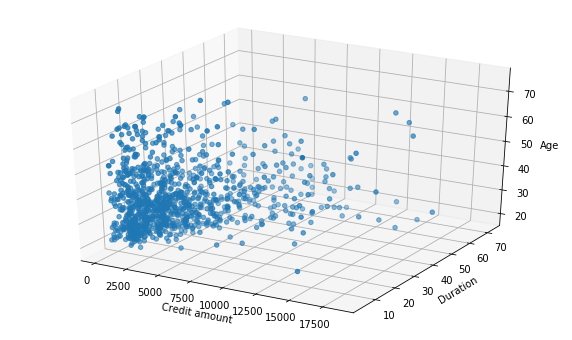

In [25]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Credit amount"], data["Duration"], data["Age"])
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

In [26]:
# Diccionario de productos a asignar: 
credict =	{
  "key_A": "Credict Gold",
  "key_B": "Credict Silver ",
  "key_C": "Credict bronze "
}

In [27]:
class Client(object):

    def set_name(self,name):
      self.name = name

    def set_age(self,age):
      self.age = age

    def set_credit_amount(self,mount):
      self.mount = mount

    def set_duration(self,duration):
      self.duration = duration

    def set_n_age(self,nage):
      self.nage = nage

    def set_n_credit_amount(self,nmount):
      self.nmount = nmount

    def set_n_duration(self,nduration):
      self.nduration = nduration

    def set_key(self,key):
      self.key = key
    
    def set_num_key(self, num_key):
      self.num_key = num_key

    def get_name(self):
      return self.name

    def get_age(self):
      return self.age

    def get_credit_amount(self):
      return self.mount

    def get_duration(self):
      return self.duration

    def get_key(self):
      return self.key 
 
    def get_n_age(self):
      return self.nage

    def get_n_credit_amount(self):
      return self.nmount

    def get_n_duration(self):
      return self.nduration
    
    def get_num_key(self):
      return self.num_key


In [28]:
# Definimos la siguiente clase:

class Clients():
  def __init__(self,data):
    self.data = data
    self.nClients = len(data)
    self.clients = numpy.ndarray((self.nClients),dtype=numpy.object)
    self.y = numpy.ndarray(self.nClients,dtype=int)
    self.load_data()
    self.set_key()
    self.normalization()

  def load_data(self):
      for c in range(self.nClients):
          client = Client()
          client.set_age(self.data["Age"][c])
          client.set_credit_amount(self.data["Credit amount"][c])
          client.set_duration(self.data["Duration"][c])
          self.clients[c] = client
          #print(self.clients[c].get_age()) 

  def set_key(self):

      for c in range(self.nClients):

        #print(self.clients[c].get_age()) #OK: aparecen las edades
        #print(self.clients[c].get_credit_amount()) #OK: aparece el monto de cada cliente

        if self.clients[c].get_credit_amount() > 5000:
          if  self.clients[c].get_age() > 20  and self.clients[c].get_age() < 50:
            self.clients[c].set_key("key_A")
            self.clients[c].set_num_key(0)
          else:
            self.clients[c].set_key("key_B")
            self.clients[c].set_num_key(1)

        if self.clients[c].get_credit_amount() < 5000 and  self.clients[c].get_credit_amount() > 1000:
          if  self.clients[c].get_age() > 20  and self.clients[c].get_age() < 50:
            self.clients[c].set_key("key_B")
            self.clients[c].set_num_key(1)
          else:
            self.clients[c].set_key("key_C")
            self.clients[c].set_num_key(2)

        if self.clients[c].get_credit_amount() < 1000:
          self.clients[c].set_key("key_C")
          self.clients[c].set_num_key(2)

        #print(self.clients[c].get_key()) # OK: asignamos las llaves 

  def normalization(self):
      data_log = np.log(self.data)
      scaler = StandardScaler()
      self.data_log_scaler = scaler.fit_transform(data_log)
      #print(data_log_scaler)
      #print()

      for c in range(self.nClients):
        self.clients[c].set_n_age(self.data_log_scaler[c,0])
        self.clients[c].set_n_credit_amount(self.data_log_scaler[c,1])
        self.clients[c].set_n_duration(self.data_log_scaler[c,2])
        #print(self.clients[c].get_n_age(), self.clients[c].get_n_credit_amount(), self.clients[c].get_n_duration())

  def getX(self):
    return self.data_log_scaler
  
  def getY(self):
    for c in range(self.nClients):
      self.y[c] = self.clients[c].get_num_key();
    
    return self.y

In [29]:
selected_cols = ["Age","Credit amount", "Duration"]
c_data = data.loc[:,selected_cols]
clients = Clients(c_data)

# Veamos las dimensiones de nuestros datos a trabajar (1000 clientes en la base):
X=clients.getX()
print(X.shape)

y = clients.getY()
print(y.shape)

(1000, 3)
(1000,)


In [30]:
from sklearn.model_selection import train_test_split
# Scikit-learn tiene una función que podemos usar llamada "train_test_split" que nos facilita dividir nuestro conjunto de datos en datos de entrenamiento y de prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Crear clasificador KNN
knn = KNeighborsClassifier (n_neighbors = 12)

# Ajustar el clasificador a los datos
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [32]:
# Mostramos las primeras 100 predicciones del modelo en los datos de prueba
array = knn.predict(X_test)[0:100]
print(array)

[1 0 1 1 1 2 1 1 2 1 1 1 1 0 1 0 2 1 1 1 1 1 1 1 0 1 0 1 1 2 1 1 0 2 2 2 1
 2 1 1 1 0 1 2 2 1 2 1 2 2 1 1 0 1 1 1 2 1 2 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 2 1 0 1 1 2 1 1 1 1 1 1 0 2 0 1 1 1 1 0 1 2 1 1 1 1]


In [33]:
# Comprobamos la precisión de nuestro modelo en los datos de prueba
knn.score(X_test, y_test)

0.935

## Por lo tanto, si consideramos 12 vecinos más cercanos, tendremos una precisión del 93.5%

## Recomendaciones por producto (BASADO EN CONTENIDO):

In [34]:
from scipy.sparse import csr_matrix

df_matrix = csr_matrix(df.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [35]:
df.shape

(12, 1000)

In [36]:
query_index = np.random.choice(df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 12)

5


In [37]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recomendaciones para {0}:\n'.format(df.index[query_index]))
    else:
        print('{0}: {1}, con una distancia de {2}:'.format(i, df.index[indices.flatten()[i]], distances.flatten()[i]))

Recomendaciones para Tarjeta de Debito:

1: Tarjeta de Credito Oro, con una distancia de 0.05476901317794858:
2: Prestamo hipotecario, con una distancia de 0.13069848085067093:
3: Transferencias, con una distancia de 0.21914769145790958:
4: Prestamo personal, con una distancia de 0.2777673327616248:
5: Tarjeta de Credito Bronce, con una distancia de 0.43422248276554465:
6: Tarjeta de Credito Plata, con una distancia de 0.573474270118757:
7: Prestamo automotriz, con una distancia de 0.573474270118757:
8: Cuenta corriente, con una distancia de 1.0:
9: Cuenta de ahorro, con una distancia de 1.0:
10: Cambio de moneda, con una distancia de 1.0:
11: Cheques, con una distancia de 1.0:


https://www.youtube.com/watch?v=kccT0FVK6OY

## Recomendaciones por cliente (FILTRADO COLABORATIVO):

In [38]:
df

,Cliente 0,Cliente 1,Cliente 2,Cliente 3,Cliente 4,Cliente 5,Cliente 6,Cliente 7,Cliente 8,Cliente 9,...,Cliente 990,Cliente 991,Cliente 992,Cliente 993,Cliente 994,Cliente 995,Cliente 996,Cliente 997,Cliente 998,Cliente 999
Tarjeta de Credito Oro,2.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Tarjeta de Credito Plata,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0
Tarjeta de Credito Bronce,4.0,1.0,1.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0
Cuenta corriente,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cuenta de ahorro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tarjeta de Debito,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Prestamo hipotecario,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prestamo automotriz,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0
Prestamo personal,4.0,2.0,2.0,2.0,4.0,2.0,4.0,2.0,4.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0
Transferencias,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0


In [39]:
def recommend_products(user, num_recommended_products):

  print('La lista de productos que el {} ha usado \n'.format(user))

  for m in df[df[user] > 0][user].index.tolist():
    print(m)
  
  print('\n')

  recommended_products = []

  for m in df[df[user] == 0].index.tolist():

    index_df = df.index.tolist().index(m)
    predicted_rating = df1.iloc[index_df, df1.columns.tolist().index(user)]
    recommended_products.append((m, predicted_rating))

  sorted_rm = sorted(recommended_products, key=lambda x:x[1], reverse=True)
  
  print('Lista de productos recomendados \n')
  rank = 1
  for recommended_product in sorted_rm[:num_recommended_products]:
    
    print('{}: {} - calificación:{}'.format(rank, recommended_product[0], recommended_product[1]))
    rank = rank + 1

In [40]:
df1 = df.copy()

def product_recommender(user, num_neighbors, num_recommendation):
  
  number_neighbors = num_neighbors

  knn = NearestNeighbors(metric='cosine', algorithm='brute')
  knn.fit(df.values)
  distances, indices = knn.kneighbors(df.values, n_neighbors=number_neighbors)

  user_index = df.columns.tolist().index(user)

  for m,t in list(enumerate(df.index)):
    if df.iloc[m, user_index] == 0:
      sim_products = indices[m].tolist()
      product_distances = distances[m].tolist()
    
      if m in sim_products:
        id_product = sim_products.index(m)
        sim_products.remove(m)
        product_distances.pop(id_product) 

      else:
        sim_products = sim_products[:num_neighbors-1]
        product_distances = product_distances[:num_neighbors-1]
           
      product_similarity = [1-x for x in product_distances]
      product_similarity_copy = product_similarity.copy()
      nominator = 0

      for s in range(0, len(product_similarity)):
        if df.iloc[sim_products[s], user_index] == 0:
          if len(product_similarity_copy) == (number_neighbors - 1):
            product_similarity_copy.pop(s)
          
          else:
            product_similarity_copy.pop(s-(len(product_similarity)-len(product_similarity_copy)))
            
        else:
          nominator = nominator + product_similarity[s]*df.iloc[sim_products[s],user_index]
          
      if len(product_similarity_copy) > 0:
        if sum(product_similarity_copy) > 0:
          predicted_r = nominator/sum(product_similarity_copy)
        
        else:
          predicted_r = 0

      else:
        predicted_r = 0
        
      df1.iloc[m,user_index] = predicted_r
  recommend_products(user,num_recommendation)

In [41]:
product_recommender('Cliente 354', 5, 5)

La lista de productos que el Cliente 354 ha usado 

Tarjeta de Credito Oro
Tarjeta de Credito Bronce
Tarjeta de Debito
Prestamo personal
Transferencias


Lista de productos recomendados 

1: Tarjeta de Credito Plata - calificación:3.35706179279727
2: Prestamo automotriz - calificación:3.35706179279727
3: Prestamo hipotecario - calificación:2.2355749685402277
4: Cuenta corriente - calificación:0.0
5: Cuenta de ahorro - calificación:0.0


https://towardsdatascience.com/item-based-collaborative-filtering-in-python-91f747200fab

# Programación Orientada a Objetos

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

class Recommender(object):
    def __init__(self,X_train,Y_train):
            self.X_train = X_train
            self.Y_train = Y_train


    def set_neighbors(self,n_neighbors):
        self.n_neighbors = n_neighbors

    #Fit K-Neighbors classifer
    def knc_fit(self):
        self.knc = KNeighborsClassifier(self.n_neighbors)
        self.knc.fit(self.X_train,self.Y_train)
        
    def knc_recommend(self,users):        
        return self.knc.predict(users)

    #Fit Nearest Neighbors
    def nn_fit(self):
        self.nn  = NearestNeighbors(metric='cosine', algorithm='brute')
        self.nn.fit(self.X_train.values)
    
    def knn_kneighbors(self):
        distances, indices = self.nn.kneighbors(self.X_train.values, self.n_neighbors)
        return distances,indices

    
class ContentRecommender(Recommender):
    def __init__(self,X_train,Y_train):                
        Recommender.__init__(self,X_train,Y_train)        

    def recommend(self,users):
        return Recommender.knc_recommend(self,users)

            
class ColabRecommender(Recommender):
    def __init__(self,X_train,Y_train):                
        Recommender.__init__(self,X_train,Y_train)        
    
    def recommend(self,users):
        return Recommender.knc_recommend(self,users)
    

class HybridRecommender(Recommender):
    def __init__(self,clients):
        Recommender.__init__(self,clients.getClientsData())

    def recommend(self,user):
        return "Colaborative recommendation is"
    
    def recommend(self,users):
        return "Colaborative recommendation is"


In [43]:
import numpy as np
from sklearn.preprocessing import StandardScaler

class Client(object):

    def __init__(self,age=None,credit_amount=None,duration=None):

        if age:
            self.age = age            
        if credit_amount:
            self.mount = credit_amount
        if duration:
            self.duration = duration
        
                 
    def set_name(self,name):
      self.name = name

    def set_age(self,age):
      self.age = age

    def set_credit_amount(self,mount):
      self.mount = mount

    def set_duration(self,duration):
      self.duration = duration

    def set_n_age(self,nage):
      self.nage = nage

    def set_n_credit_amount(self,nmount):
      self.nmount = nmount

    def set_n_duration(self,nduration):
      self.nduration = nduration

    def set_key(self,key):
      self.key = key
    
    def set_num_key(self, num_key):
      self.num_key = num_key

    def get_name(self):
      return self.name

    def get_age(self):
      return self.age

    def get_credit_amount(self):
      return self.mount

    def get_duration(self):
      return self.duration

    def get_key(self):
      return self.key 
 
    def get_n_age(self):
      return self.nage

    def get_n_credit_amount(self):
      return self.nmount

    def get_n_duration(self):
      return self.nduration
    
    def get_num_key(self):
      return self.num_key


  

class Clients(object):
  def __init__(self,data):
    self.data = data
    self.nClients = len(data)
    self.clients = np.ndarray((self.nClients),dtype=np.object)
    self.y = np.ndarray(self.nClients,dtype=int)
    self.load_data()
    self.set_key()
    self.normalization()

  def load_data(self):
      for c in range(self.nClients):
          client = Client()
          client.set_age(self.data["Age"][c])
          client.set_credit_amount(self.data["Credit amount"][c])
          client.set_duration(self.data["Duration"][c])
          self.clients[c] = client
          #print(self.clients[c].get_age()) 

  def set_key(self):

      for c in range(self.nClients):

        #print(self.clients[c].get_age()) #OK: aparecen las edades
        #print(self.clients[c].get_credit_amount()) #OK: aparece el monto de cada cliente

        if self.clients[c].get_credit_amount() > 5000:
          if  self.clients[c].get_age() > 20  and self.clients[c].get_age() < 50:
            self.clients[c].set_key("key_A")
            self.clients[c].set_num_key(0)
          else:
            self.clients[c].set_key("key_B")
            self.clients[c].set_num_key(1)

        if self.clients[c].get_credit_amount() < 5000 and  self.clients[c].get_credit_amount() > 1000:
          if  self.clients[c].get_age() > 20  and self.clients[c].get_age() < 50:
            self.clients[c].set_key("key_B")
            self.clients[c].set_num_key(1)
          else:
            self.clients[c].set_key("key_C")
            self.clients[c].set_num_key(2)

        if self.clients[c].get_credit_amount() < 1000:
          self.clients[c].set_key("key_C")
          self.clients[c].set_num_key(2)

        #print(self.clients[c].get_key()) # OK: asignamos las llaves 

  def normalization(self):
      data_log = np.log(self.data)
      scaler = StandardScaler()
      self.data_log_scaler = scaler.fit_transform(data_log)
      
      for c in range(self.nClients):
        self.clients[c].set_n_age(self.data_log_scaler[c,0])
        self.clients[c].set_n_credit_amount(self.data_log_scaler[c,1])
        self.clients[c].set_n_duration(self.data_log_scaler[c,2])

  def getX(self):
    return self.data_log_scaler
  
  def getY(self):
    for c in range(self.nClients):
      self.y[c] = self.clients[c].get_num_key();
    
    return self.y

## Construimos nuestra matriz con base a la información del cliente:

In [44]:
import numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import NearestNeighbors
from numpy import random

#Cargamos la base de datos:
data = pd.read_csv('german_credit_data_2.csv')

data

,Customer,Age,Credit amount,Duration,Key,Tarjeta de Credito Oro,Tarjeta de Credito Plata,Tarjeta de Credito Bronce,Cuenta corriente,Cuenta de ahorro,Tarjeta de Debito,Prestamo hipotecario,Prestamo automotriz,Prestamo personal,Transferencias,Cambio de moneda,Cheques
0,0,67,1169,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,22,5951,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,49,2096,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,45,7882,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,53,4870,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1736,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,996,40,3857,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,997,38,804,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,998,23,1845,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Asignamos etiquetas para la columna llave:

data['Key'] = np.where((data['Credit amount']>= 5000) & (data['Age']>20)  & (data['Age']<50), 'Key_A', data['Key'])
data['Key'] = np.where((data['Credit amount']>= 5000) & (data['Age']<20), 'Key_B', data['Key'])
data['Key'] = np.where((data['Credit amount']>= 5000) & (data['Age']>50), 'Key_B', data['Key'])
data['Key'] = np.where((data['Credit amount']< 5000) & (data['Credit amount']>= 1000) & (data['Age']>20)  & (data['Age']<50), 'Key_B', data['Key'])
data['Key'] = np.where((data['Credit amount']< 5000) & (data['Credit amount']>= 1000) & ((data['Age']<20)), 'Key_C', data['Key'])
data['Key'] = np.where((data['Credit amount']< 5000) & (data['Credit amount']>= 1000) & ((data['Age']>50)), 'Key_C', data['Key'])
data['Key'] = np.where((data['Credit amount']< 1000), 'Key_C', data['Key'])

data

,Customer,Age,Credit amount,Duration,Key,Tarjeta de Credito Oro,Tarjeta de Credito Plata,Tarjeta de Credito Bronce,Cuenta corriente,Cuenta de ahorro,Tarjeta de Debito,Prestamo hipotecario,Prestamo automotriz,Prestamo personal,Transferencias,Cambio de moneda,Cheques
0,0,67,1169,6,Key_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,22,5951,48,Key_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,49,2096,12,Key_B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,45,7882,42,Key_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,53,4870,24,Key_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1736,12,Key_B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,996,40,3857,30,Key_B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,997,38,804,12,Key_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,998,23,1845,45,Key_B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Asignamos calificaciones para los primeros tres productos:
data['Tarjeta de Credito Oro'] = np.where((data['Key'] == 'Key_A'), random.randint(4, 5), random.randint(0, 3))
data['Tarjeta de Credito Plata'] = np.where((data['Key'] == 'Key_B'), random.randint(4, 5), random.randint(0, 3))
data['Tarjeta de Credito Bronce'] = np.where((data['Key'] == 'Key_C'), random.randint(4, 5), random.randint(0, 3))

data

,Customer,Age,Credit amount,Duration,Key,Tarjeta de Credito Oro,Tarjeta de Credito Plata,Tarjeta de Credito Bronce,Cuenta corriente,Cuenta de ahorro,Tarjeta de Debito,Prestamo hipotecario,Prestamo automotriz,Prestamo personal,Transferencias,Cambio de moneda,Cheques
0,0,67,1169,6,Key_C,2,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,22,5951,48,Key_A,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,49,2096,12,Key_B,2,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,45,7882,42,Key_A,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,53,4870,24,Key_C,2,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1736,12,Key_B,2,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,996,40,3857,30,Key_B,2,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,997,38,804,12,Key_C,2,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,998,23,1845,45,Key_B,2,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data['Key'] = np.where((data['Key']== 'Key_A'), 0 , data['Key'])
data['Key'] = np.where((data['Key']== 'Key_B'), 1 , data['Key'])
data['Key'] = np.where((data['Key']== 'Key_C'), 2 , data['Key'])
data

,Customer,Age,Credit amount,Duration,Key,Tarjeta de Credito Oro,Tarjeta de Credito Plata,Tarjeta de Credito Bronce,Cuenta corriente,Cuenta de ahorro,Tarjeta de Debito,Prestamo hipotecario,Prestamo automotriz,Prestamo personal,Transferencias,Cambio de moneda,Cheques
0,0,67,1169,6,2,2,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,22,5951,48,0,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,49,2096,12,1,2,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,45,7882,42,0,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,53,4870,24,2,2,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1736,12,1,2,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,996,40,3857,30,1,2,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,997,38,804,12,2,2,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,998,23,1845,45,1,2,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
data['Prestamo hipotecario'] = np.where((data['Tarjeta de Credito Oro'] == 5), random.randint(4, 5), data['Prestamo hipotecario'])
data['Prestamo hipotecario'] = np.where((data['Tarjeta de Credito Oro'] == 4), random.randint(4, 5), random.randint(0, 3))
data['Prestamo automotriz'] = np.where((data['Tarjeta de Credito Plata'] == 5), random.randint(4, 5), data['Prestamo automotriz'])
data['Prestamo automotriz'] = np.where((data['Tarjeta de Credito Plata'] == 4), random.randint(4, 5), random.randint(0, 3))
data['Prestamo personal'] = np.where((data['Tarjeta de Credito Bronce'] == 5), random.randint(4, 5), data['Prestamo personal'])
data['Prestamo personal'] = np.where((data['Tarjeta de Credito Bronce'] == 4), random.randint(4, 5), random.randint(0, 3))
data['Tarjeta de Debito'] = np.where((data['Tarjeta de Credito Oro'] == 5), random.randint(4, 5), data['Tarjeta de Debito'])
data['Tarjeta de Debito'] = np.where((data['Tarjeta de Credito Oro'] == 4), random.randint(4, 5), random.randint(0, 3))
data['Transferencias'] = np.where((data['Tarjeta de Credito Bronce'] == 5), random.randint(4, 5), data['Tarjeta de Debito'])
data['Transferencias'] = np.where((data['Tarjeta de Credito Bronce'] == 4), random.randint(4, 5), random.randint(0, 3))

base = data.replace(np.nan, random.randint(0, 1))
base

,Customer,Age,Credit amount,Duration,Key,Tarjeta de Credito Oro,Tarjeta de Credito Plata,Tarjeta de Credito Bronce,Cuenta corriente,Cuenta de ahorro,Tarjeta de Debito,Prestamo hipotecario,Prestamo automotriz,Prestamo personal,Transferencias,Cambio de moneda,Cheques
0,0,67,1169,6,2,2,1,4,0.0,0.0,0,2,1,4,4,0.0,0.0
1,1,22,5951,48,0,4,1,0,0.0,0.0,4,4,1,0,2,0.0,0.0
2,2,49,2096,12,1,2,4,0,0.0,0.0,0,2,4,0,2,0.0,0.0
3,3,45,7882,42,0,4,1,0,0.0,0.0,4,4,1,0,2,0.0,0.0
4,4,53,4870,24,2,2,1,4,0.0,0.0,0,2,1,4,4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1736,12,1,2,4,0,0.0,0.0,0,2,4,0,2,0.0,0.0
996,996,40,3857,30,1,2,4,0,0.0,0.0,0,2,4,0,2,0.0,0.0
997,997,38,804,12,2,2,1,4,0.0,0.0,0,2,1,4,4,0.0,0.0
998,998,23,1845,45,1,2,4,0,0.0,0.0,0,2,4,0,2,0.0,0.0


In [49]:
base.dtypes

Customer                       int64
Age                            int64
Credit amount                  int64
Duration                       int64
Key                           object
Tarjeta de Credito Oro         int32
Tarjeta de Credito Plata       int32
Tarjeta de Credito Bronce      int32
Cuenta corriente             float64
Cuenta de ahorro             float64
Tarjeta de Debito              int32
Prestamo hipotecario           int32
Prestamo automotriz            int32
Prestamo personal              int32
Transferencias                 int32
Cambio de moneda             float64
Cheques                      float64
dtype: object

In [50]:
# Transformamos todas las columnas a enteros:
base["Cuenta corriente"] = base["Cuenta corriente"].astype("int32")
base["Cuenta de ahorro"] = base["Cuenta de ahorro"].astype("int32")
base["Cambio de moneda"] = base["Cambio de moneda"].astype("int32")
base["Cheques"] = base["Cheques"].astype("int32")
base

,Customer,Age,Credit amount,Duration,Key,Tarjeta de Credito Oro,Tarjeta de Credito Plata,Tarjeta de Credito Bronce,Cuenta corriente,Cuenta de ahorro,Tarjeta de Debito,Prestamo hipotecario,Prestamo automotriz,Prestamo personal,Transferencias,Cambio de moneda,Cheques
0,0,67,1169,6,2,2,1,4,0,0,0,2,1,4,4,0,0
1,1,22,5951,48,0,4,1,0,0,0,4,4,1,0,2,0,0
2,2,49,2096,12,1,2,4,0,0,0,0,2,4,0,2,0,0
3,3,45,7882,42,0,4,1,0,0,0,4,4,1,0,2,0,0
4,4,53,4870,24,2,2,1,4,0,0,0,2,1,4,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1736,12,1,2,4,0,0,0,0,2,4,0,2,0,0
996,996,40,3857,30,1,2,4,0,0,0,0,2,4,0,2,0,0
997,997,38,804,12,2,2,1,4,0,0,0,2,1,4,4,0,0
998,998,23,1845,45,1,2,4,0,0,0,0,2,4,0,2,0,0


In [51]:
base.isnull().sum()

Customer                     0
Age                          0
Credit amount                0
Duration                     0
Key                          0
Tarjeta de Credito Oro       0
Tarjeta de Credito Plata     0
Tarjeta de Credito Bronce    0
Cuenta corriente             0
Cuenta de ahorro             0
Tarjeta de Debito            0
Prestamo hipotecario         0
Prestamo automotriz          0
Prestamo personal            0
Transferencias               0
Cambio de moneda             0
Cheques                      0
dtype: int64

## Notemos tres cosas en esta parte:

## 1) Contamos ya con las etiquetas '0', '1', '2' que hacen alusión a las llaves
## 2) Contamos con las distancias
## 3) Contamos con clientes similares (vecinos más cercanos)

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.model_selection import train_test_split
import warnings
#from Clients import Client, Clients
#from Recommender import ColabRecommender
from numpy import random

warnings.filterwarnings("ignore")

#data          = pd.read_csv('german_credit_data (1).csv')
numeric_data  = base.loc[:,["Age","Credit amount","Duration"]]
clients       = Clients(numeric_data)

X = clients.getX()
y = clients.getY()

client_product_matrix = base
print(client_product_matrix)


y= base['Key'].tolist()
X = client_product_matrix.drop(columns=['Key'])


#Clasifier
X_train, X_test, Y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1, stratify=y)
colabRecommender = ColabRecommender(X_train,Y_train)
colabRecommender.set_neighbors(10)
colabRecommender.knc_fit()
print(colabRecommender.recommend(X_test)[0:200])


#Nearest neighbors
colabRecommender_NN = ColabRecommender(X_train=X,Y_train=Y_train)
colabRecommender_NN.set_neighbors(10)
colabRecommender.nn_fit()
d,i = colabRecommender.knn_kneighbors()
print(d,i)

     Customer  Age  Credit amount  Duration Key  Tarjeta de Credito Oro  \
0           0   67           1169         6   2                       2   
1           1   22           5951        48   0                       4   
2           2   49           2096        12   1                       2   
3           3   45           7882        42   0                       4   
4           4   53           4870        24   2                       2   
..        ...  ...            ...       ...  ..                     ...   
995       995   31           1736        12   1                       2   
996       996   40           3857        30   1                       2   
997       997   38            804        12   2                       2   
998       998   23           1845        45   1                       2   
999       999   27           4576        45   1                       2   

     Tarjeta de Credito Plata  Tarjeta de Credito Bronce  Cuenta corriente  \
0                    

In [53]:
Recomendaciones = colabRecommender.recommend(X_test)[0:200]
Recomendaciones = Recomendaciones.tolist()
Recomendaciones = [int(x) for x in Recomendaciones]
Recomendaciones

[0,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 1]

In [54]:
for i in range(len(Recomendaciones)):
    
    if Recomendaciones[i] == 0:
        Recomendaciones[i] = 'Key_A'
    if Recomendaciones[i] == 1:
        Recomendaciones[i] = 'Key_B'
    if Recomendaciones[i] == 2:
        Recomendaciones[i] = 'Key_C'
        
Recomendaciones

['Key_A',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_C',
 'Key_B',
 'Key_B',
 'Key_A',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_C',
 'Key_B',
 'Key_C',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_C',
 'Key_B',
 'Key_B',
 'Key_A',
 'Key_B',
 'Key_A',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_A',
 'Key_B',
 'Key_A',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_A',
 'Key_A',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_A',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_C',
 'Key_A',
 'Key_B',
 'Key_B',
 'Key_A',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_A',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_A',
 'Key_A',
 'Key_B',
 'Key_B',
 'Key_C',
 'Key_C',
 'Key_B',
 'Key_A',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_A',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_A',
 'Key_B',
 'Key_A',
 'Key_B',
 'Key_B',
 'Key_B',
 'Key_C',
 'Key_B',
 'Key_B',


## Creamos un diccionario de productos que hacen referencia a las llaves:

In [55]:
credict = {
    "Key_A": "Tarjeta de Credito Oro",
    "Key_B": "Tarjeta de Credito Plata",
    "Key_C": "Tarjeta de Credito Bronce",
    "Key_D": "Cuenta corriente",
    "Key_E": "Cuenta de ahorro",
    "Key_F": "Tarjeta de Debito",
    "Key_G": "Prestamo hipotecario",
    "Key_H": "Prestamo automotriz",
    "Key_I": "Prestamo personal",
    "Key_J": "Transferencias",
    "Key_K": "Cambio de moneda",
    "Key_L": "Cheques"
}

## Importamos el diccionario a un formato de tipo .JSON

In [56]:
import json
credict = json.dumps(credict)
with open('Diccionario.json', 'w') as fp:
    json.dump(credict, fp)

## Nuestros productos finales a considerar serán:

In [57]:
credict = {
    "Key_A": "Tarjeta de Credito Oro",
    "Key_B": "Tarjeta de Credito Plata",
    "Key_C": "Tarjeta de Credito Bronce",
    "Key_D": "Cuenta corriente",
    "Key_E": "Cuenta de ahorro",
    "Key_F": "Tarjeta de Debito",
    "Key_G": "Prestamo hipotecario",
    "Key_H": "Prestamo automotriz",
    "Key_I": "Prestamo personal",
    "Key_J": "Transferencias",
    "Key_K": "Cambio de moneda",
    "Key_L": "Cheques"
}

import pandas as pd
recomendacion = [list(range(0, len(Recomendaciones))), Recomendaciones]
df = pd.DataFrame(recomendacion)
df = df.transpose()


for key in credict:
    df.loc[df[1].str.contains(key), 'Producto Recomendado'] = credict[key]
    

df2 = df.rename(columns={0:'ID Cliente', 1:'Llave asignada'})
df2.columns
df2

,ID Cliente,Llave asignada,Producto Recomendado
0,0,Key_A,Tarjeta de Credito Oro
1,1,Key_B,Tarjeta de Credito Plata
2,2,Key_B,Tarjeta de Credito Plata
3,3,Key_B,Tarjeta de Credito Plata
4,4,Key_C,Tarjeta de Credito Bronce
...,...,...,...
195,195,Key_C,Tarjeta de Credito Bronce
196,196,Key_B,Tarjeta de Credito Plata
197,197,Key_B,Tarjeta de Credito Plata
198,198,Key_C,Tarjeta de Credito Bronce
